In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\SSD\\Desktop\\SAFU\\US_Accidents_March23.csv")

In [3]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
#check for null or missing values
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [7]:
#Dropping the columns with huge number of null values
df.drop(columns=['End_Lat','End_Lng','Wind_Chill(F)','Precipitation(in)'],axis=1,inplace=True)

In [8]:
#storing categorical column names to a new variable
categorical=[i for i in df.columns if df[i].dtype=='O']
#for categorical values we can replace the null values with the Mode of it
for i in categorical:
    df[i].fillna(df[i].mode()[0],inplace=True)

C:\Users\SSD\AppData\Local\Temp\ipykernel_5756\106596135.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)


In [9]:
df.drop(columns=['Wind_Speed(mph)', 'Visibility(mi)', 'Pressure(in)', 'Humidity(%)', 'Temperature(F)'], axis=1, inplace=True)

In [10]:
df.isna().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Wind_Direction           0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
d

In [11]:
#checking for duplicates
df.duplicated().sum()

0

In [12]:
#City with most Number of accidents
city_acc = df['City'].value_counts().sort_values(ascending = False).reset_index()
city_acc

,City,count
0,Miami,187170
1,Houston,169609
2,Los Angeles,156491
3,Charlotte,138652
4,Dallas,130939
...,...,...
13673,Bon Secour,1
13674,Sidney Center,1
13675,Fluker,1
13676,Mapleville,1


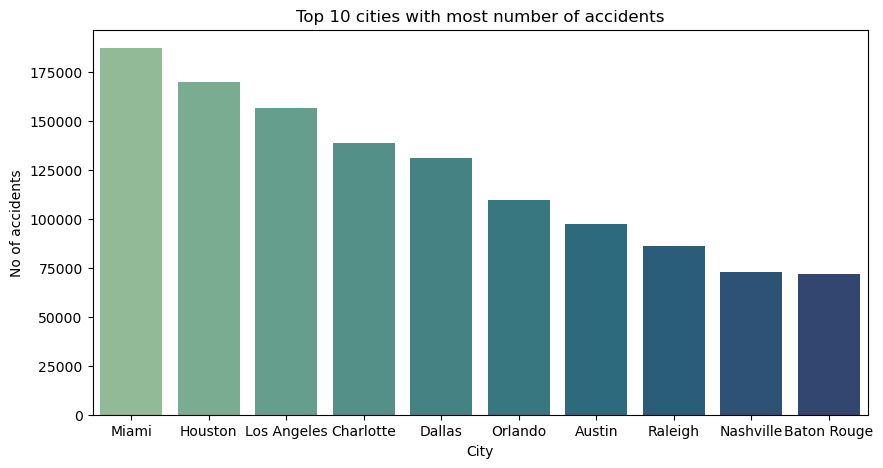

In [13]:
#Top 10 cities with most number of accidents
plt.figure(figsize=(10,5))
sns.barplot(x='City',y='count',data= city_acc.head(10),hue='City', palette='crest', legend=False)
plt.title("Top 10 cities with most number of accidents")
plt.ylabel("No of accidents")
plt.show()

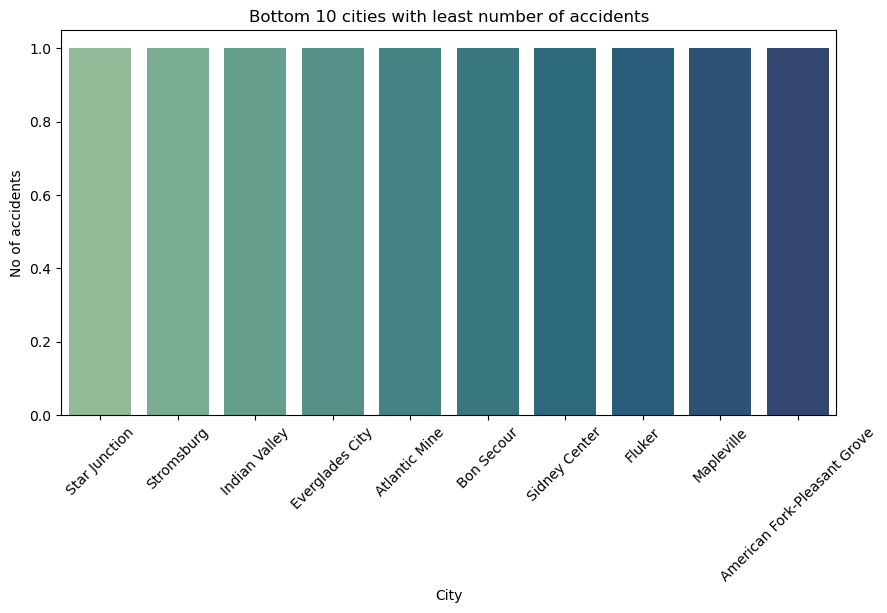

In [14]:
#10 cities with least number of accidents
plt.figure(figsize=(10,5))
sns.barplot(x='City',y='count',data= city_acc.tail(10),hue='City', palette='crest', legend=False)
plt.title("Bottom 10 cities with least number of accidents")
plt.ylabel("No of accidents")
plt.xticks(rotation=45)
plt.show()

In [15]:
#State with most and least Number of accidents
state_acc = df['State'].value_counts().sort_values(ascending = False).reset_index()
state_acc

,State,count
0,CA,1741433
1,FL,880192
2,TX,582837
3,SC,382557
4,NY,347960
5,NC,338199
6,VA,303301
7,PA,296620
8,MN,192084
9,OR,179660


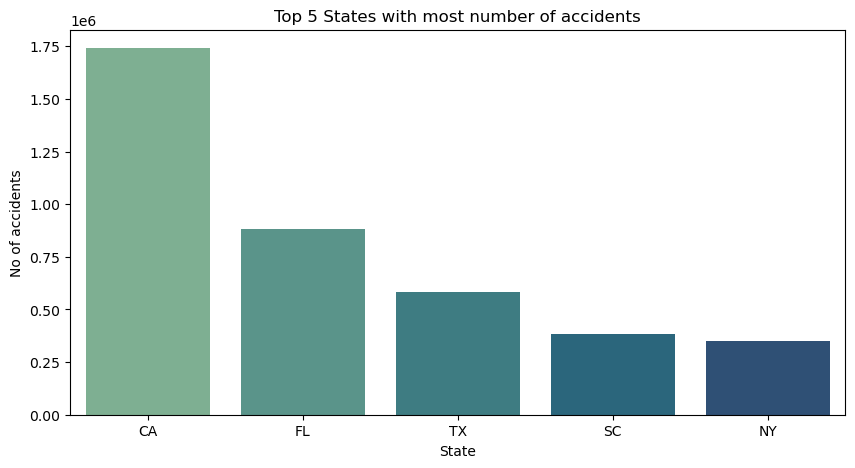

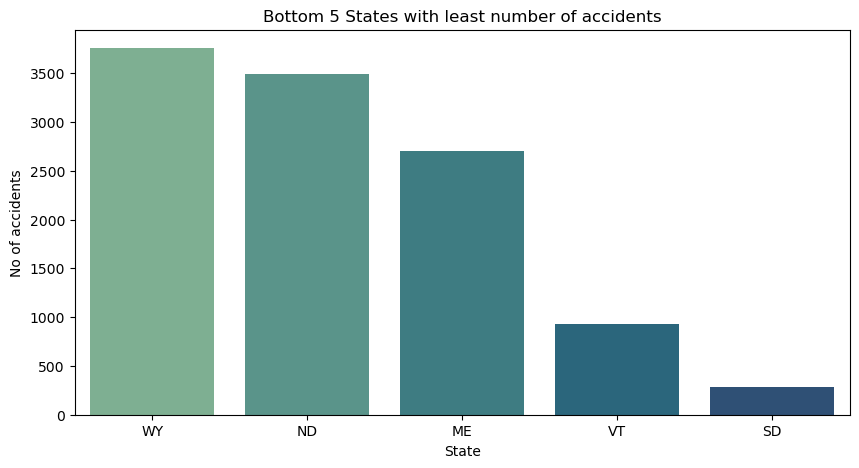

In [16]:
## States with most number of accidents
plt.figure(figsize=(10,5))
sns.barplot(x='State',y='count',data= state_acc.head(5),hue='State', palette='crest', legend=False)
plt.title("Top 5 States with most number of accidents")
plt.ylabel("No of accidents")
plt.show()

## States with the least number of accidents
plt.figure(figsize=(10,5))
sns.barplot(x='State',y='count',data= state_acc.tail(5),hue='State', palette='crest', legend=False)
plt.title("Bottom 5 States with least number of accidents")
plt.ylabel("No of accidents")
plt.show()

In [17]:
df['Severity'].value_counts().index

Index([2, 3, 4, 1], dtype='int64', name='Severity')

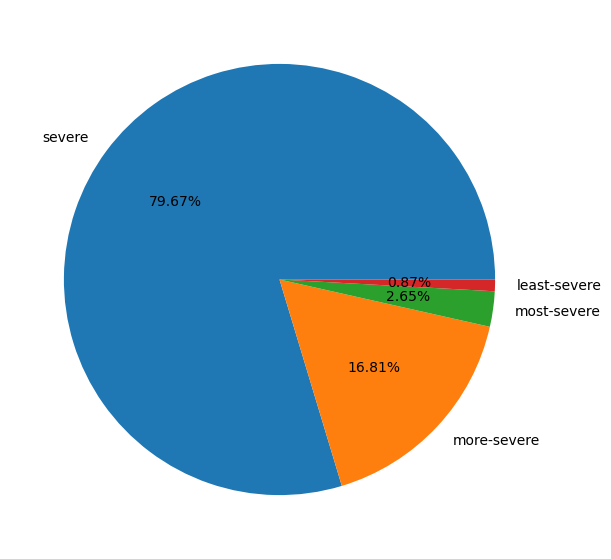

In [18]:
plt.figure(figsize=(7,7))
plt.pie(df['Severity'].value_counts(),labels=['severe','more-severe','most-severe','least-severe'],autopct="%1.2f%%")
plt.show()

In [19]:
# Convert the 'Start_Time' column to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract the year from the 'Start_Time' column and store it in a new column called 'Year'
df['Year'] = df['Start_Time'].dt.year

# Display the first few rows to verify
print(df[['Start_Time', 'Year']].head())

           Start_Time    Year
0 2016-02-08 05:46:00  2016.0
1 2016-02-08 06:07:59  2016.0
2 2016-02-08 06:49:27  2016.0
3 2016-02-08 07:23:34  2016.0
4 2016-02-08 07:39:07  2016.0


In [20]:
df['Year'].value_counts()

Year
2021.0    1412433
2022.0    1268806
2020.0    1161598
2019.0     954302
2018.0     893426
2017.0     717290
2016.0     410821
2023.0     166552
Name: count, dtype: int64

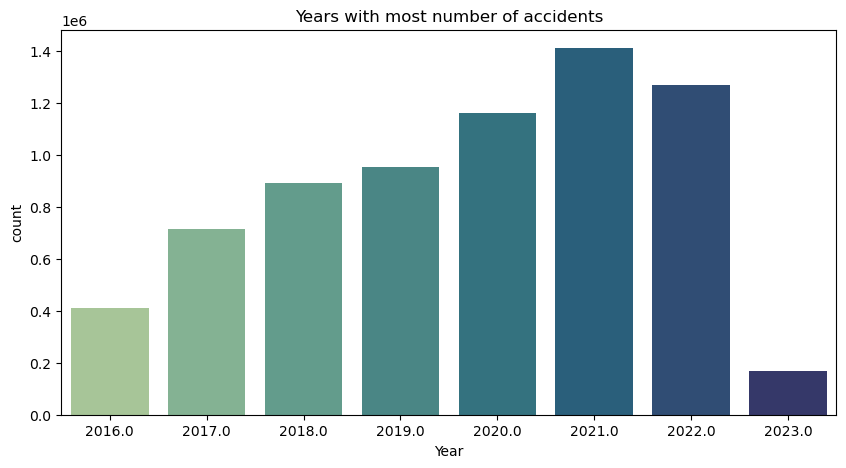

In [21]:
#Year with most number of accidents
year_count = df['Year'].value_counts().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='Year',y='count',data=year_count,hue='Year', palette='crest', legend=False)
plt.title("Years with most number of accidents")
plt.show()

In [22]:
#Number of accidents at different time zones
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

In [23]:
# Extract the time and store it in a new column 'Time'
df['Time'] = df['Start_Time'].dt.time

In [24]:
# Function to categorize time
def categorize_time(time):
    if pd.isna(time):
        return 'Unknown'
    if time >= pd.to_datetime('05:00:00').time() and time < pd.to_datetime('12:00:00').time():
        return 'Morning'
    elif time >= pd.to_datetime('12:00:00').time() and time < pd.to_datetime('17:00:00').time():
        return 'Afternoon'
    elif time >= pd.to_datetime('17:00:00').time() and time < pd.to_datetime('21:00:00').time():
        return 'Evening'
    else:
        return 'Night'


In [25]:
# Apply the function to create a new column 'Time_Zone'
df['Time_Zone'] = df['Time'].apply(categorize_time)

In [26]:
# Filter out 'Unknown' time zones for plotting
filtered_df = df[df['Time_Zone'] != 'Unknown']

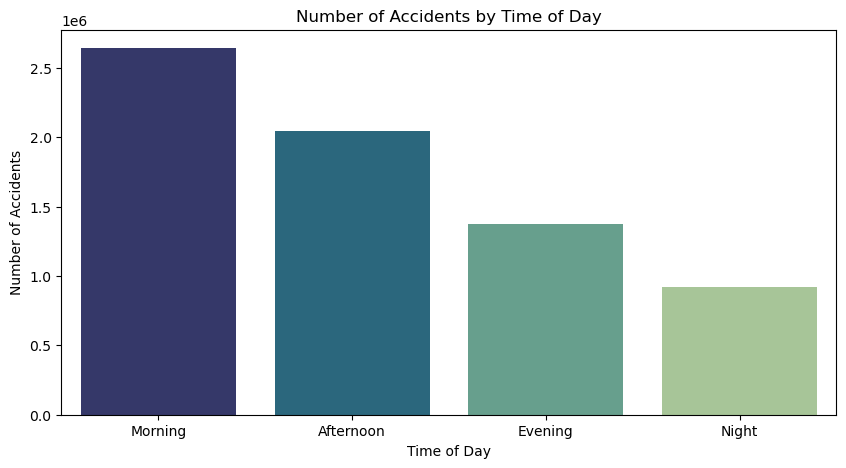

In [27]:
# Count the number of accidents in each timezone
time_zone_counts = filtered_df['Time_Zone'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=time_zone_counts.index, y=time_zone_counts.values, hue=time_zone_counts.values, palette='crest', legend=False)
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Time of Day')
plt.show()

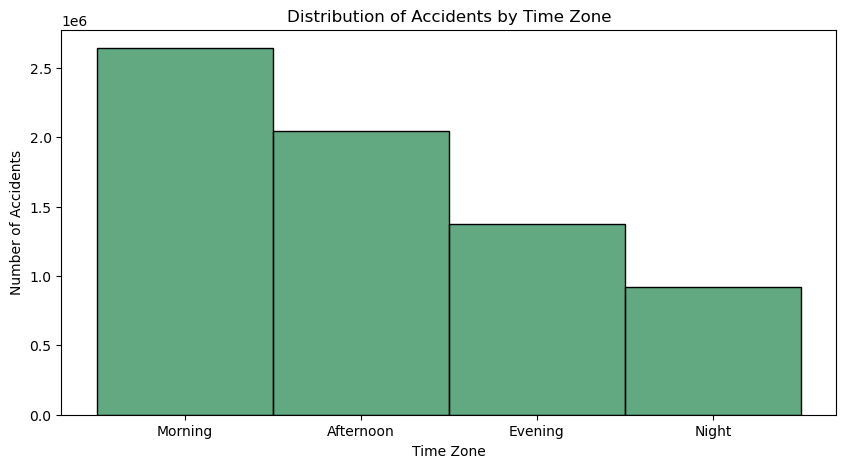

In [28]:
#histogram to show the distribution of accidents through the time zones
plt.figure(figsize=(10, 5))
sns.histplot(filtered_df['Time_Zone'], bins=4, kde=False, color='seagreen')
plt.xlabel('Time Zone')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Time Zone')
plt.show()

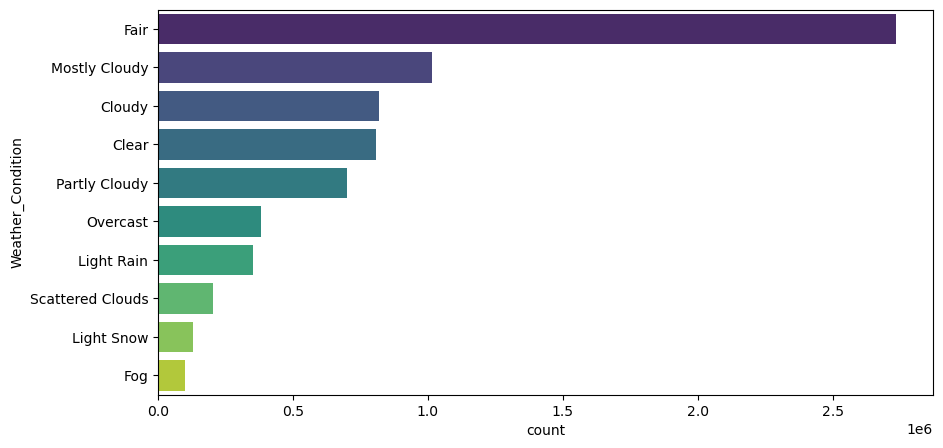

In [29]:
#Weather conditions at the time of accidents
plt.figure(figsize=(10, 5))
weather = df['Weather_Condition'].value_counts().sort_values(ascending=False).reset_index()
sns.barplot(x='count',y='Weather_Condition',data=weather[:10],orient='horizontal',palette='viridis',hue='Weather_Condition', legend=False)
plt.show()

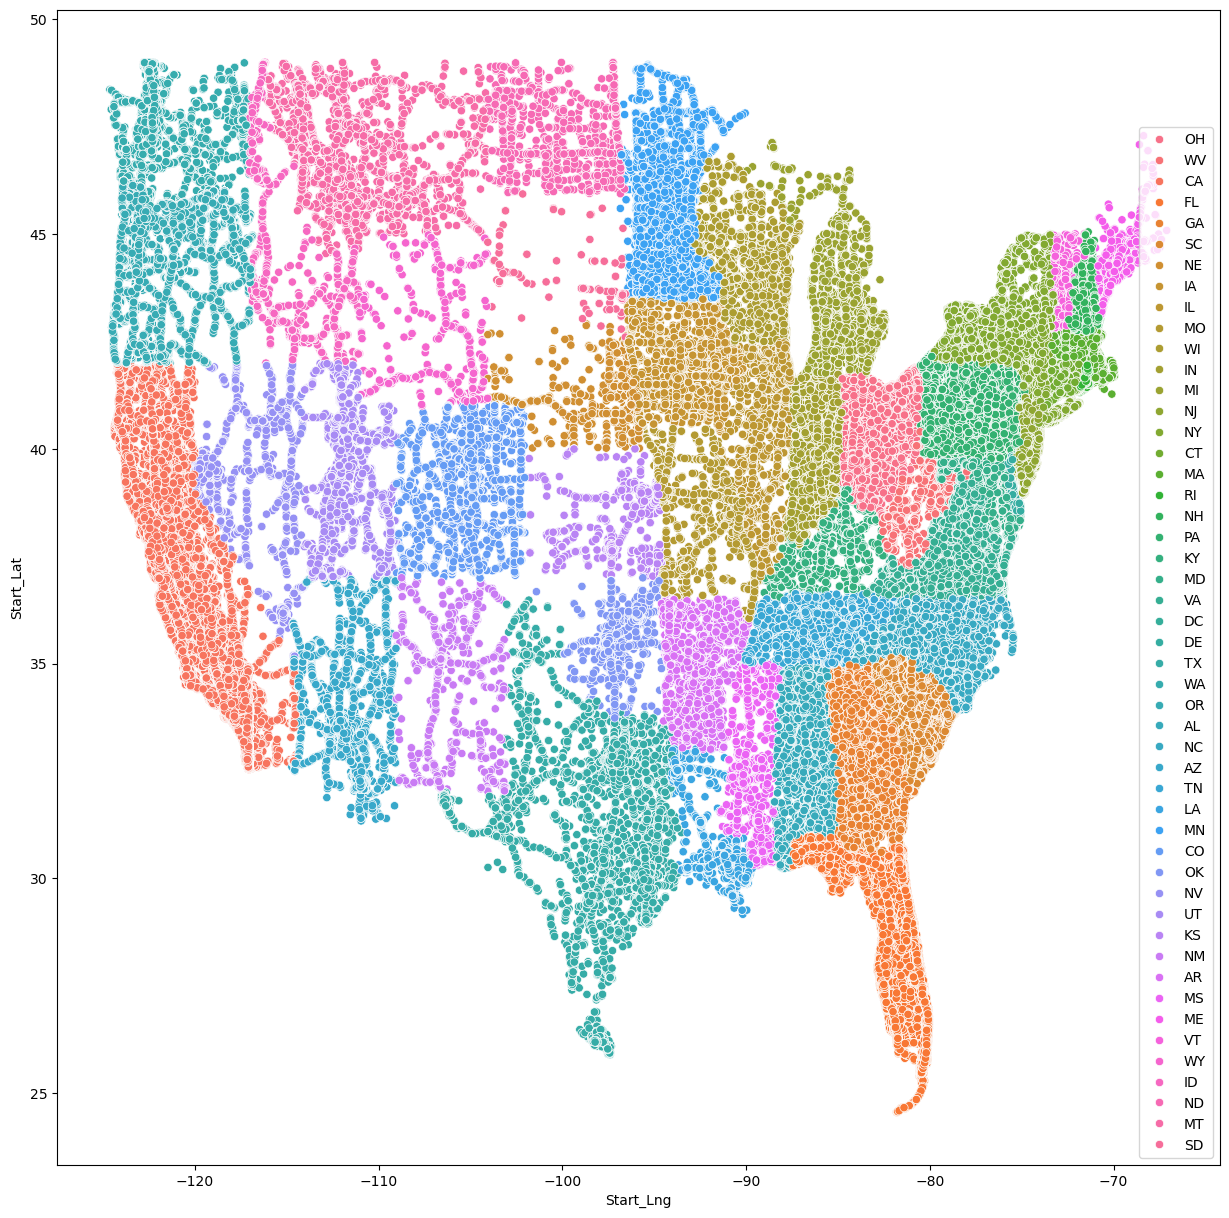

In [68]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=df['Start_Lng'],y=df['Start_Lat'],hue=df['State'])
plt.legend(loc="lower right")
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['Start_Lng'],y=df['Start_Lat'],hue=df['Severity'])
plt.show()